I don't want to put the codes, names, and coordinates of the entire database of geocaches into an undecrypted, publically available database. Geocaching.com requires a login, and ethically I should not just make all of that data open.

I am therefore making separate diles for the geocache codes, names, coordinates, and the anonymized info, and those will be the only files uploaded.

This file is my key to associating dataframes for (A) names, (B) codes, (C) coordinates, and (D) other info. This notebook will redacted before upload.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
features = pd.read_csv('../data/working_files/features.csv')
df = pd.read_csv('../data/working_files/cleaned_data.csv')
txt_col_list = list(features[features['feature type']=='text']['feature'])
for col in txt_col_list:
    df[col] = df[col].fillna('')
X2 = pd.read_csv('./data/X2.csv')


In [3]:
L = df.shape[0]
L

12433

In [4]:
# index for codes: 

C = list(range(L))
len(C)


12433

In [46]:
K0 = '0918273645.1425367.908.9012783465'


In [47]:

KEY = [pd.to_numeric(K0[7] +K0[0] +K0[24] +K0[20]+K0[10]+K0[8]), 
       pd.to_numeric(K0[13]+K0[20]+K0[0]  +K0[24]+K0[10]+K0[13]), 
       pd.to_numeric(K0[23]+K0[24]+K0[20] +K0[0] +K0[22]+K0[29])]
#KEY

In [48]:
# index for names:
def CodetoName(c_list):
    n_list  = [np.power(cc-KEY[0],2) for cc in c_list]
    return n_list

N = CodetoName(C)

# index for lat-long:
def CodetoCoords(c_list):
    xy_list = [np.power(cc-KEY[1],2) for cc in c_list]
    return xy_list

XY = CodetoCoords(C)

# index for other info:
def CodetoOtherInfo(c_list):
    z_list  = [np.power(cc-KEY[2],2) for cc in c_list]
    return z_list

Z = CodetoOtherInfo(C)

def NametoCode(n_list):
    A = [np.power(nn,0.5) for nn in n_list]
    c_list = [np.round(KEY[0]+aa) if aa%1>0.5 else np.round(KEY[0]-aa) for aa in A]
    c_list = [int(cc) for cc in c_list]
    return c_list

def CoordstoCode(xy_list):
    A = [np.power(xy,0.5) for xy in xy_list]
    c_list = [np.round(KEY[1]+aa) if aa%1>0.5 else np.round(KEY[1]-aa) for aa in A]
    c_list = [int(cc) for cc in c_list]
    return c_list

def OtherInfotoCode(z_list):
    A = [np.power(zz,0.5) for zz in z_list]
    c_list = [np.round(KEY[2]+aa) if aa%1>0.5 else np.round(KEY[2]-aa) for aa in A]
    c_list = [int(cc) for cc in c_list]
    return c_list

In [49]:
Cchk = NametoCode(N)
chk = np.array(C)-np.array(Cchk)
print(chk.min(), chk.max())

Cchk = CoordstoCode(XY)
chk = np.array(C)-np.array(Cchk)
print(chk.min(), chk.max())

Cchk = OtherInfotoCode(Z)
chk = np.array(C)-np.array(Cchk)
print(chk.min(), chk.max())

0 0
0 0
0 0


In [50]:
chk = pd.DataFrame({'Code Index': C, 'Name Index': N, 'Coords Index': XY, 'Index to Other Info': Z})
chk.head()

,Code Index,Name Index,Coords Index,Index to Other Info
0,0,36004800.16,4000800.04,81005400.09
1,1,35992800.36,3996800.64,80987400.49
2,2,35980802.56,3992803.24,80969402.89
3,3,35968806.76,3988807.84,80951407.29
4,4,35956812.96,3984814.44,80933413.69


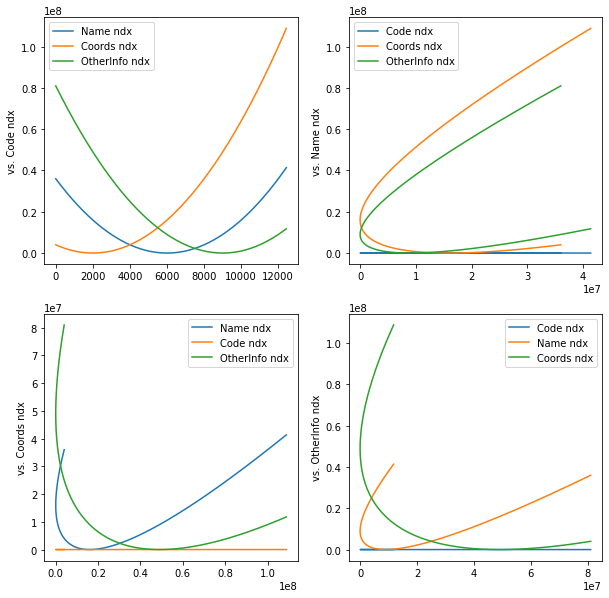

In [51]:
fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(2,2,1);
plt.plot(C,N,label='Name ndx');
plt.plot(C,XY,label='Coords ndx');
plt.plot(C,Z,label='OtherInfo ndx');
plt.ylabel('vs. Code ndx');
plt.legend();
ax = fig.add_subplot(2,2,2);
plt.plot(N,C,label='Code ndx');
plt.plot(N,XY,label='Coords ndx');
plt.plot(N,Z,label='OtherInfo ndx');
plt.ylabel('vs. Name ndx');
plt.legend();
ax = fig.add_subplot(2,2,3);
plt.plot(XY,N,label='Name ndx');
plt.plot(XY,C,label='Code ndx');
plt.plot(XY,Z,label='OtherInfo ndx');
plt.ylabel('vs. Coords ndx');
plt.legend();
ax = fig.add_subplot(2,2,4);
plt.plot(Z,C,label='Code ndx');
plt.plot(Z,N,label='Name ndx');
plt.plot(Z,XY,label='Coords ndx');
plt.ylabel('vs. OtherInfo ndx');
plt.legend();


In [52]:
chk.nunique()

Code Index             12433
Name Index             12433
Coords Index           12433
Index to Other Info    12433
dtype: int64

In [53]:
chk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code Index           12433 non-null  int64  
 1   Name Index           12433 non-null  float64
 2   Coords Index         12433 non-null  float64
 3   Index to Other Info  12433 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 388.7 KB


In [54]:
codes = pd.DataFrame({'code_index': C, 'code':list(df['code'])})
codes.head()

,code_index,code
0,0,GC1A1E7
1,1,GC92B2K
2,2,GC90JDX
3,3,GCH72A
4,4,GC8D3PX


In [55]:
names = pd.DataFrame({'name_index': N, 'name':list(df['name'])}).sort_values(by='name_index')
names.head()

,name_index,name
6000,0.16,South River Trail: Triple Claw
6001,0.36,Canada Traveler Challenge: 5 Provinces
5999,1.96,Milledge Mystery Renewed
6002,2.56,Guarding South Fulton #21
5998,5.76,Hottest Park n Ride


In [56]:
ctext = pd.DataFrame({'name_index': N, 'cache_text':list(df['cache_text'])}).sort_values(by='name_index')
ctext.head()

,name_index,cache_text
6000,0.16,South River Trail: Triple Claw<p>This cache is...
6001,0.36,Canada Traveler Challenge: 5 Provinces<center>...
5999,1.96,"Milledge Mystery Renewed<h3 style=""text-align:..."
6002,2.56,Guarding South Fulton #21This cache is for the...
5998,5.76,Hottest Park n Ride<p>Urban sprawl has come to...


In [57]:
coords = pd.DataFrame({'coords_index': XY, 'latitude':list(df['latitude']), 'longitude':list(df['longitude'])}).sort_values(by='coords_index')
coords.head()

,coords_index,latitude,longitude
2000,0.04,34.374433,-85.631683
2001,0.64,34.437067,-85.758900
1999,1.44,34.435733,-85.754983
2002,3.24,34.688217,-85.526500
1998,4.84,34.616850,-85.768367


In [60]:
cachedata = X2.drop(columns=['latitude', 'longitude']).copy()
cachedata['index'] = Z
cachedata = cachedata.sort_values(by='index')
cachedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12433 entries, 9000 to 0
Data columns (total 57 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   good_logs_num                            12433 non-null  int64  
 1   neutral_logs_num                         12433 non-null  int64  
 2   bad_logs_num                             12433 non-null  int64  
 3   difficulty                               12433 non-null  float64
 4   terrain                                  12433 non-null  float64
 5   size                                     12433 non-null  float64
 6   status                                   12433 non-null  int64  
 7   is_premium                               12433 non-null  int64  
 8   short_description                        12433 non-null  int64  
 9   long_description                         12433 non-null  int64  
 10  hints                                    12433 

In [17]:
codes.to_csv('../data/working_files/codes.csv',index=False)
names.to_csv('../data/working_files/names.csv',index=False)
ctext.to_csv('../data/working_files/ctext.csv',index=False)
coords.to_csv('../data/final_files/coords.csv',index=False)
cachedata.to_csv('../data/working_files/strippeddata.csv',index=False)